---

# **A - INTRODUCTION**

Name: Muhammad Fattahillah

Project: Predicting Cell Phone Price Ranges Using Supervised Machine Learning Model Classification

Dataset: mobile_prices.csv

Dataset Link: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

## **A.1 - BACKGROUND STORY**

My friend wants to create a new company in the field of mobile phones and he wants to compete with well-known mobile phone brands such as Samsung, Vivo, Oppo, Xiaomi, etc.

The problem was, he didn't know how to estimate the price of the cellphone his company would make. Because competition from popular brands is very competitive, he didn't want to just assume. Therefore, he collected cellphone sales data from several companies.

My friend wants to find out the relationship between the features of a cellphone and its selling price. But a new problem arose, he was not good at machine learning, so he needed my help to solve this problem.

## **A.2 - MAIN OBJECTIVE**

The main goal of this project is to create a Classification Model that is able to predict the price range of a cellphone based on the size, features and performance of the cellphone.

---

# **B - IMPORT LIBRARIES**

In creating a project in a Python notebook, the first thing you have to do is import **or determine the **features** from the library that you want to use later in the project. This process is done to ensure the **features** These can later be implemented during project work.

In [1]:
# Base
import pandas as pd
import numpy as np
from scipy.stats import skew

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Save Mode
import joblib

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

---

# **C - DATA LOADING**

After determining the features of the library that will be used in the project, the next step is to call/load the data that was previously obtained from the www.kaggle.com website. This data was last updated in 2017, so the cellphone specifications or features in this data may not be current.

## **C.1 - LOAD FILE**

In [2]:
# Membaca file csv dan mendefine menjadi df
df = pd.read_csv('mobile_prices.csv')

In [3]:
# Melihat 10 data pertama
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Melihat 10 data terakhir
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


**Insight:**

| Nama Kolom     | Deskripsi Singkat |
|-------------------|-----------------------------------------------------------------------------------------------|
| battery_power     | Total energi yang dapat disimpan baterai dalam satu waktu diukur dalam MAH |
| blue              | Memiliki bluetooth atau tidak (0 = No, 1 = Yes) |
| clock_speed       | Kecepatan mikroprosesor mengeksekusi instruksi |
| dual_sim          | Memiliki dual sim atau tidak (0 = No, 1 = Yes) |
| fc                | Mega piksel Kamera Depan |
| four_g            | Memiliki 4g atau tidak (0 = No, 1 = Yes) |
| int_memory        | Memori Internal dalam Gigabyte |
| m_dep             | Ketebalan ponsel dalam cm |
| mobile_wt         | Berat ponsel |
| n_cores           | Jumlah inti prosesor |
| pc                | Mega piksel Kamera Utama |
| px_height         | Tinggi Resolusi Piksel |
| px_width          | Lebar Resolusi Piksel |
| ram               | Memori Akses Acak (RAM) dalam Megabyte |
| sc_h              | Tinggi Layar ponsel dalam cm |
| sc_w              | Lebar Layar ponsel dalam cm |
| talk_time         | Waktu terlama yang dapat digunakan untuk satu kali pengisian baterai saat digunakan |
| three_g           | Memiliki 3g atau tidak (0 = No, 1 = Yes) |
| touch_screen      | Memiliki layar sentuh atau tidak (0 = No, 1 = Yes) |
| wifi              | Memiliki wifi atau tidak (0 = No, 1 = Yes) |
| price_range       | Ini adalah variabel target dengan nilai 0(low cost), 1(medium cost), 2(high cost), dan 3(very high cost) |


## **C.2 - DATASET SUMMARY**

In [5]:
# Melihat summary dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Insight:**

- **RangeIndex**: *The number of entries in this data is 2000 entries.*

- **Data columns**: *This data consists of a total of 21 columns.*

- **Non-Null Count**: *For each column, the non-null count indicates that there are no missing (null) values in the data. This is a good indication, as complete data is easier to analyze.*

- **Dtype**: *This indicates the data type of each column is numerical type, with 2 columns of type float and 19 columns of type int.*

---

# **D - EXPLORATORY DATA ANALYSIS (EDA)**

After carrying out a brief overview of the data, a more in-depth analysis will now be carried out.

## **D.1 - STATISTICS SUMMARY**

In [6]:
# Melihat summary statistik dari data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


**Insight:**

1. **battery_power**: *The average cellphone battery capacity is around 1238 mAh, with variations from 501 mAh to 1998 mAh.*

2. **blue**: *About half of cellphones (49.5%) have Bluetooth features.*

3. **clock_speed**: *Average mobile processor speed is around 1.52 GHz, with variations from 0.5 GHz to 3.0 GHz.*

4. **dual_sim**: *About half of phones (50.95%) have dual SIM.*

5. **fc**: *The average cellphone front camera is around 4.31 megapixels, with variations from 0 to 19 megapixels.*

6. **four_g**: *Most cellphones (52.15%) have 4G network support.*

7. **int_memory**: *Average internal memory capacity is around 32 GB, with variations from 2 GB to 64 GB.*

8. **m_dep**: *The average thickness of a cell phone is around 0.50 cm, with variations from 0.1 cm to 1.0 cm.*

9. **mobile_wt**: *The average weight of a cellphone is around 140 grams, with variations from 80 grams to 200 grams.*

10. **n_cores**: *The average number of processor cores is around 4.52, with variations from 1 to 8 cores.*

11. **pc**: *The average main camera on a cellphone is around 9.92 megapixels, with variations from 0 to 20 megapixels.*

12. **px_height**: *The average screen resolution height is approximately 645 pixels, with variations from 0 pixels to 1960 pixels.*

13. **px_width**: *Average screen resolution width is approximately 1251 pixels, with variations from 500 pixels to 1998 pixels.*

14. **ram**: *Average RAM capacity is around 2124 MB, with variations from 256 MB to 3998 MB.*

15. **sc_h**: *The average screen height is around 12.31 cm, with variations from 5 cm to 19 cm.*

16. **sc_w**: *The average screen width is around 5.77 cm, with variations from 0 cm to 18 cm.*

17. **talk_time**: *Average talk time is approximately 11.01 hours, with variations from 2 hours to 20 hours.*

18. **three_g**: *Most cellphones (76.15%) have 3G network support.*

19. **touch_screen**: *About half of phones (50.3%) have a touch screen.*

20. **wifi**: *About half of phones (50.7%) have Wi-Fi.*

21. **price_range**: *The average cell phone price range is around 1.5, which may indicate that this data has been categorized into four price groups: 0(low cost), 1(medium cost), 2(high cost), and 3(very high cost).*

## **D.2 - DATA DUPLICATED CHECK**

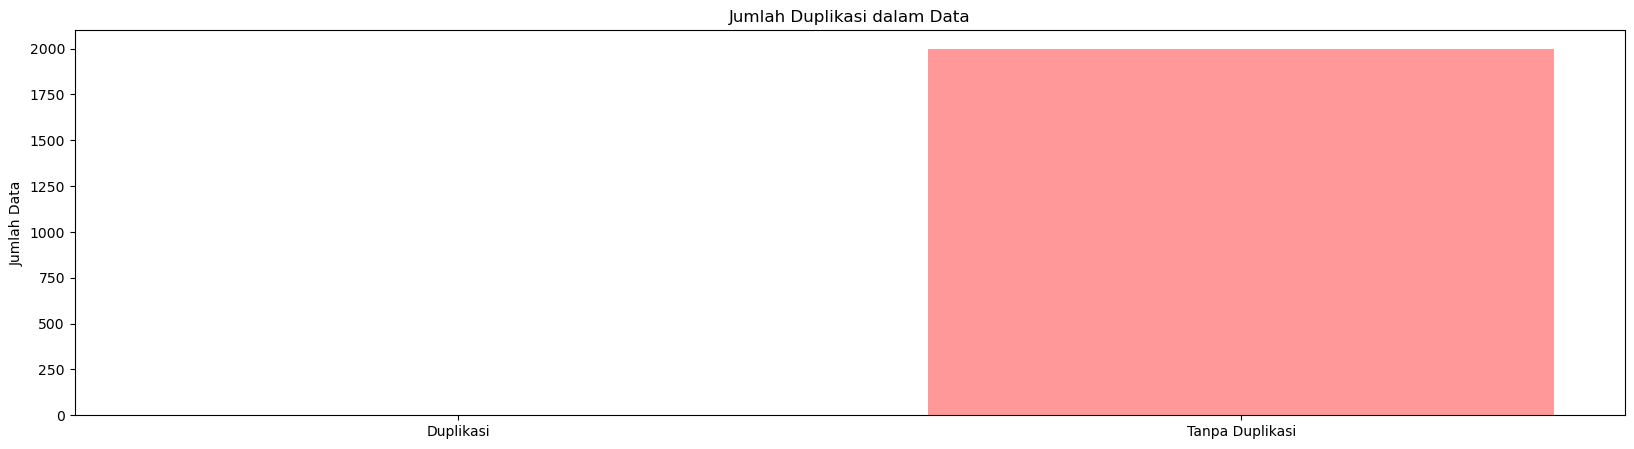

In [7]:
# Menghitung jumlah duplikasi
duplicate_count = df.duplicated().sum()

# Membuat bar plot untuk menunjukkan jumlah duplikasi
plt.figure(figsize=(20, 5))
plt.bar(['Duplikasi', 'Tanpa Duplikasi'], [duplicate_count, len(df) - duplicate_count], color=['red', '#ff9999'])
plt.ylabel('Jumlah Data')
plt.title('Jumlah Duplikasi dalam Data')
plt.show()

**Insight:**

*From the results above, it shows that there are no duplicate entries in this data.*

## **D.3 - CARDINALITY CHECK**

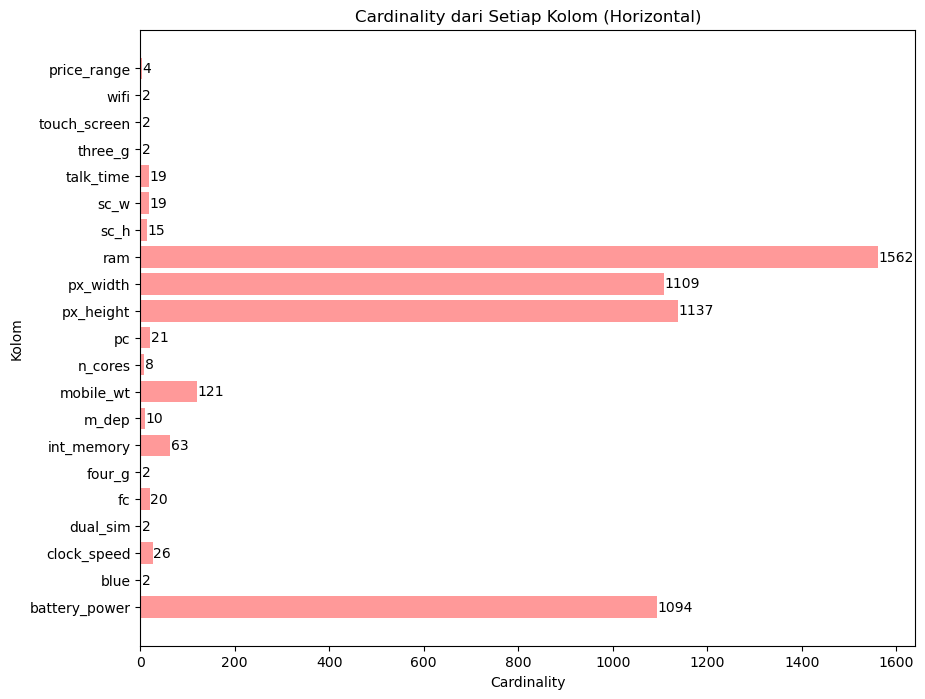

In [8]:
# Menghitung cardinality untuk setiap kolom
cardinality = df.nunique()

# Membuat histogram cardinality secara horizontal untuk setiap kolom
plt.figure(figsize=(10, 8))
ax = plt.barh(cardinality.index, cardinality, color='#ff9999')

# Menambahkan jumlah cardinality di dalam setiap bar
for rect in ax:
    width = rect.get_width()
    plt.text(width + 1, rect.get_y() + rect.get_height()/2, f'{width}', ha='left', va='center')

plt.xlabel('Cardinality')
plt.ylabel('Kolom')
plt.title('Cardinality dari Setiap Kolom (Horizontal)')
plt.show()

**Insight:**

*From the results of the cardinality visualization above, it shows that there is no need for further handling regarding these columns, because the majority are of continuous numerical and discrete numerical types, none of which are categorical.*

## **D.4 - DISTRIBUTION CHECK**

### **D.4.1 - PIE CHART NUMERIC CATEGORICAL COLUMNS**

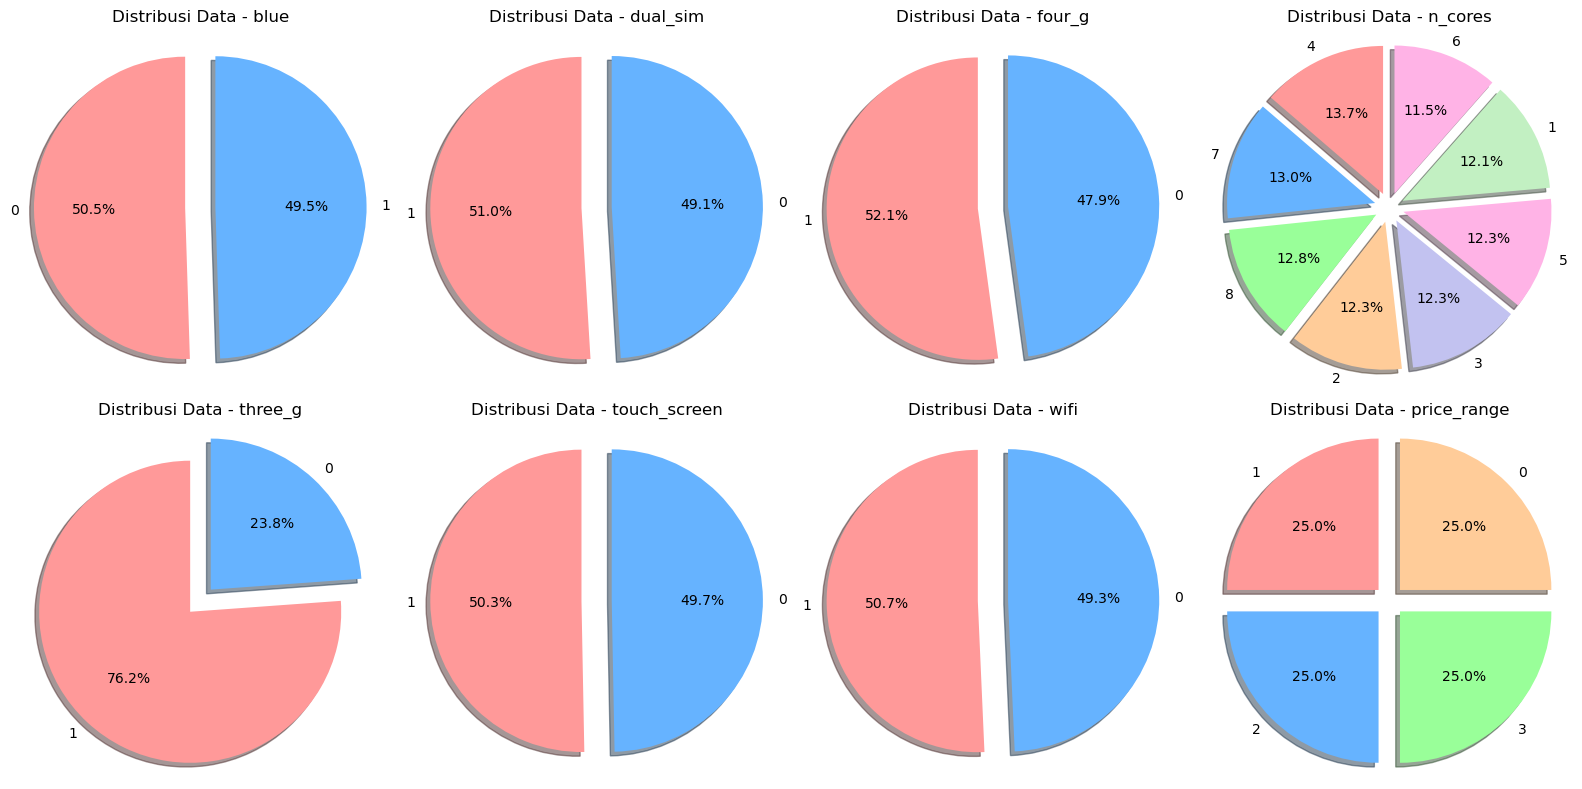

In [9]:
# Kolom-kolom yang akan diplot
pie_cols = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']

# Warna yang akan digunakan
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6', '#c2f0c2', '#ffb3e6']

# Ukuran gambar subplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Membuat pie chart terpisah untuk setiap kolom
for i, column in enumerate(pie_cols):
    sizes = df[column].value_counts().values
    labels = df[column].value_counts().index
    explode = [0.1] * len(sizes)
    ax = axes[i // 4, i % 4]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, colors=colors, explode=explode)
    ax.axis('equal')
    ax.set_title(f'Distribusi Data - {column}')

# Menampilkan gambar subplot
plt.tight_layout()
plt.show()

**Insight:**

*From the visualization above, it can be seen that the data distribution for cellphones that have Bluetooth, dual SIM, 4G, touch screen and WiFi tends to be evenly distributed. For 3G connectivity, 23.8% of cellphones do not have this feature. The number of cores for each cellphone is divided evenly, starting from 1 core to 8 cores. And the price range classification is also divided evenly by 25% each into 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost)*

### **D.4.2 - HISTOGRAM NUMERICAL COLUMNS**

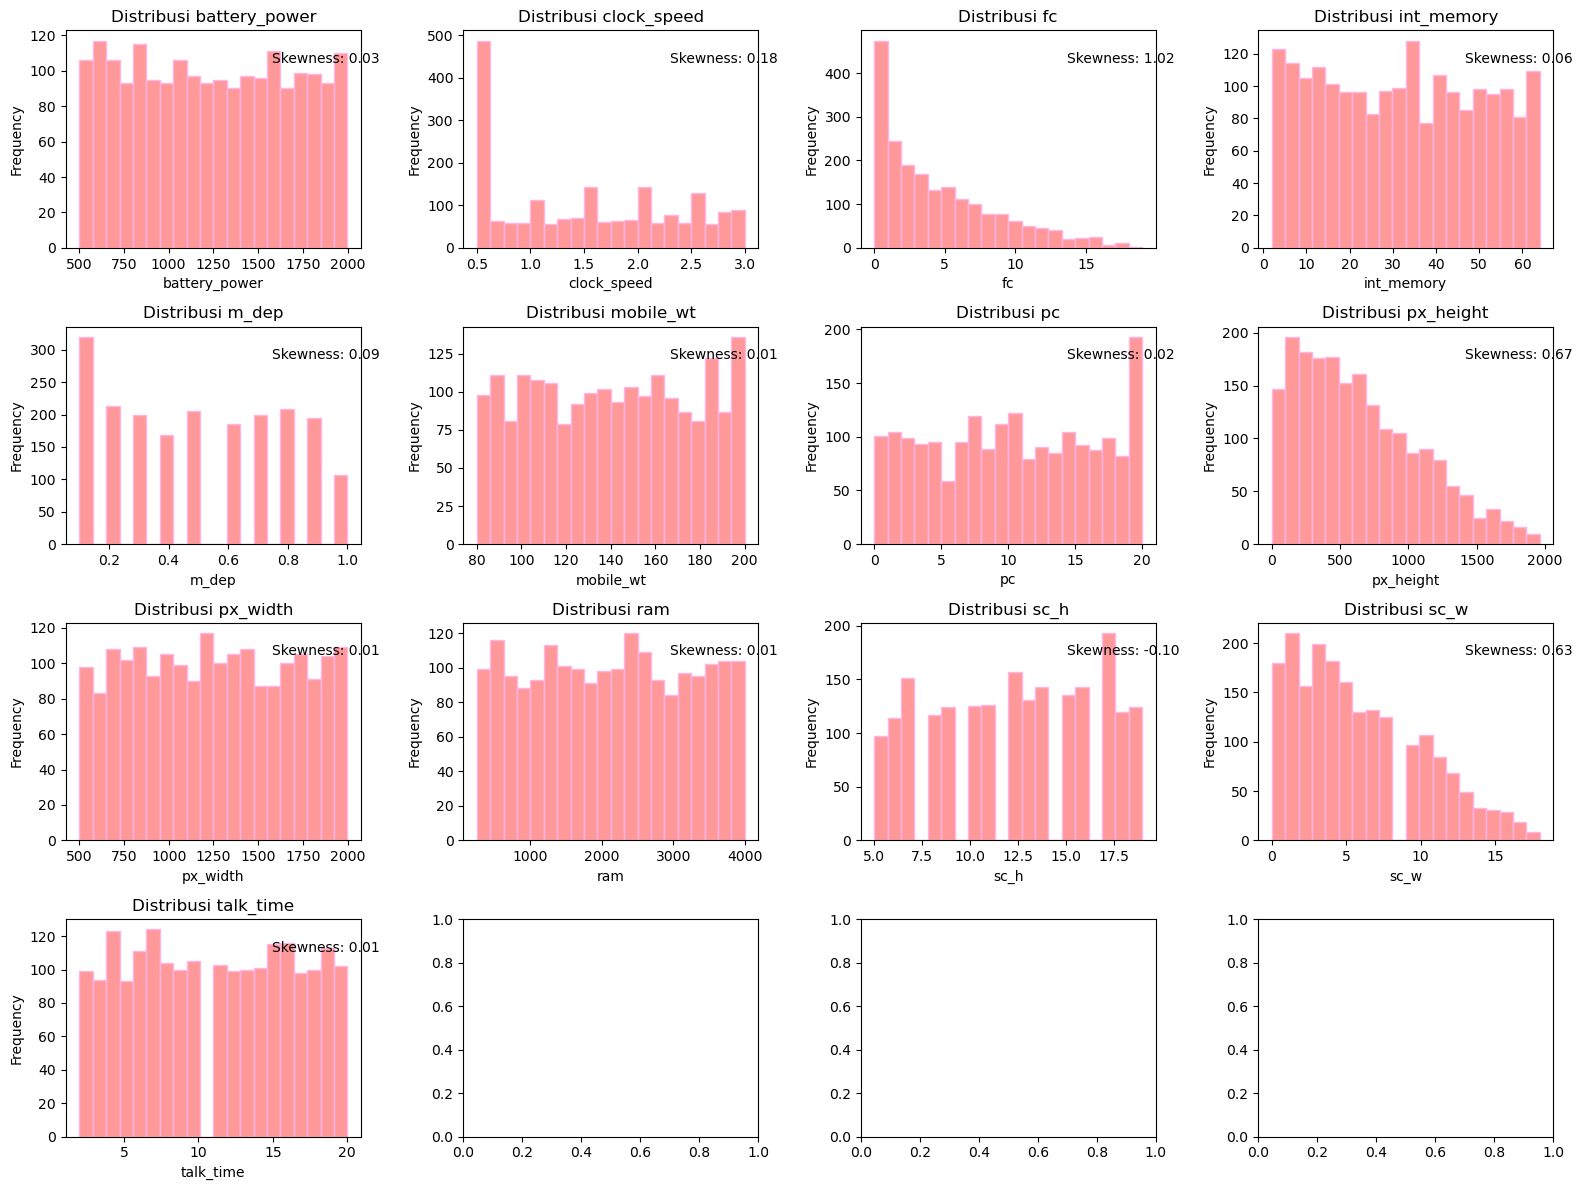

In [10]:
# Kolom-kolom yang akan diplot
bar_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
           'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Ukuran gambar subplot
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)

# Membuat bar plot untuk masing-masing kolom dan menambahkan nilai skewness
for i, column in enumerate(bar_cols):
    ax = axes[i // 4, i % 4]
    df[column].plot(kind='hist', ax=ax, bins=20, color='#ff9999', edgecolor='#ffb3e6')
    ax.set_title(f'Distribusi {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    
    # Menghitung skewness
    skewness = skew(df[column])
    ax.annotate(f'Skewness: {skewness:.2f}', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=10, color='black')

# Menampilkan gambar subplot
plt.tight_layout()
plt.show()


**Insight:**

*From the results above it can be seen that the majority of the columns are normally distributed, except for the 'fc', 'px_height', and 'sc_w' columns. Specifically, columns that are detected as positively skewed and negatively skewed will later be handled.*

## **D.5 - OUTLIERS CHECK**

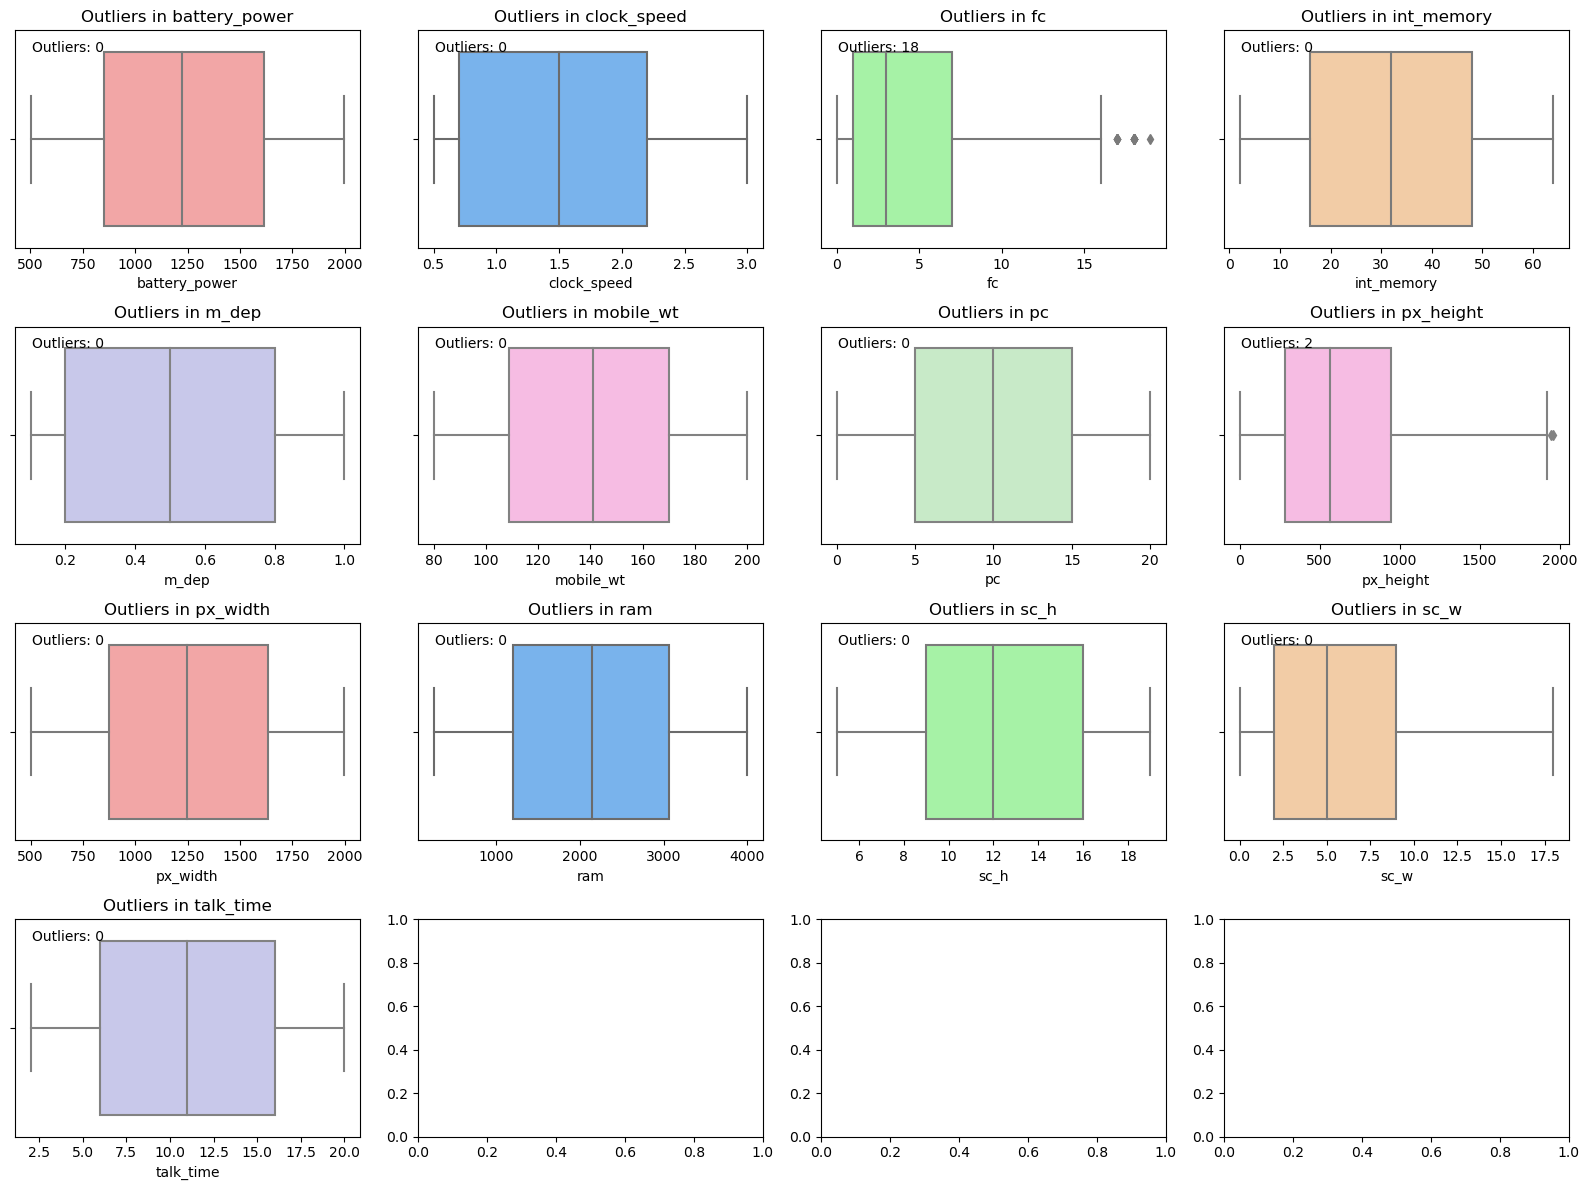

In [11]:
# Ukuran gambar subplot
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)

# Memilih palet warna yang telah Anda definisikan sebelumnya
color_palette = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6', '#c2f0c2', '#ffb3e6']

# Membuat box plot untuk masing-masing kolom dengan palet warna
for i, column in enumerate(bar_cols):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x=df[column], ax=ax, color=color_palette[i % len(color_palette)])
    ax.set_title(f'Outliers in {column}')
    ax.set_xlabel(column)
    
    # Menghitung jumlah outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    
    # Menambahkan teks jumlah outliers ke dalam plot
    ax.text(0.05, 0.9, f'Outliers: {outliers_count}', transform=ax.transAxes, fontsize=10, color='black')

# Menampilkan gambar subplot
plt.tight_layout()
plt.show()


**Insight:**

*From the visualization above, it can be seen that there are outliers in the 'fc' and 'px_height' columns, but they are classified as insignificant and very few, therefore no further handling will be carried out regarding these outliers because they probably have important information.*

## **D.6 - FEATURES VS PRICE RANGE**

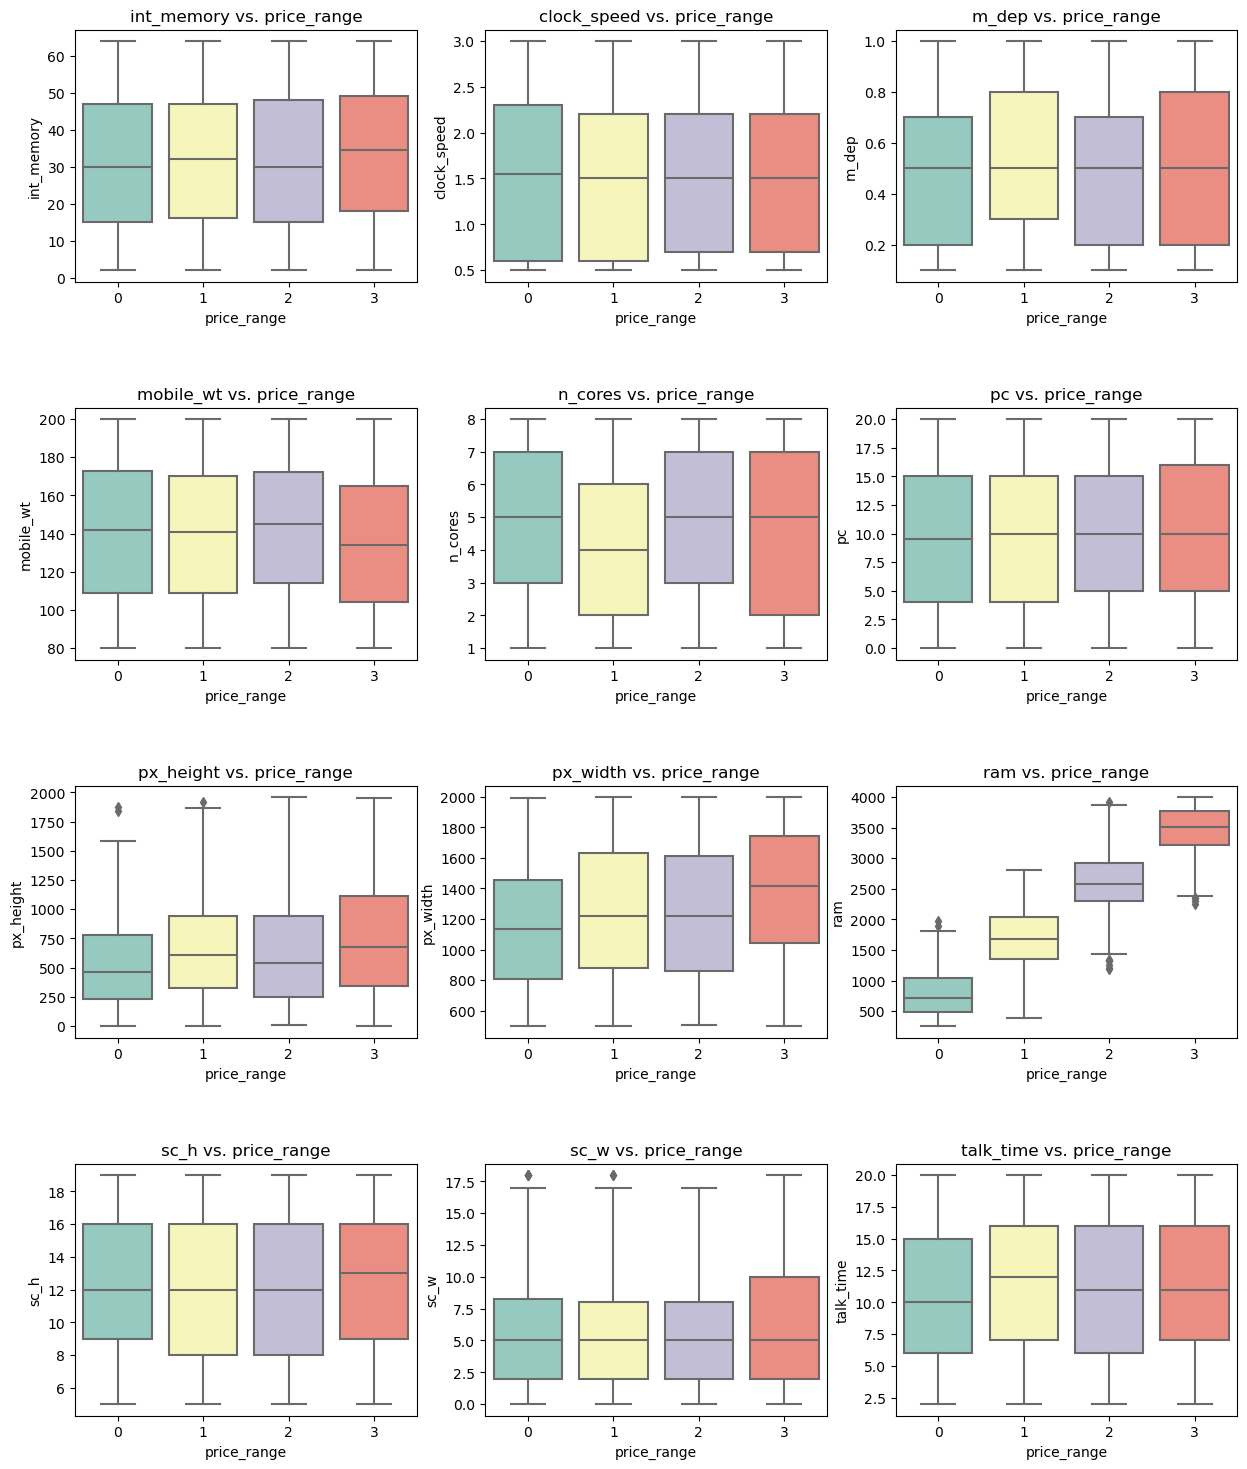

In [12]:
# Menentukan fitur-fitur yang akan diplot
kolom = ['int_memory', 'clock_speed', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width',
         'ram', 'sc_h', 'sc_w', 'talk_time']

# Menentukan jumlah baris dan kolom subplot
rows = 4
cols = 3

# Membuat subplot
fig, axes = plt.subplots(rows, cols, figsize=(15, 18))
fig.subplots_adjust(hspace=0.5)

# Meloop melalui setiap fitur dan membuat plot
for i, feature in enumerate(kolom):
    row = i // cols
    col = i % cols
    sns.boxplot(x='price_range', y=feature, data=df, palette='Set3', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. price_range')
    axes[row, col].set_xlabel('price_range')
    axes[row, col].set_ylabel(feature)

# Menampilkan plot
plt.show()

**Insight:**

1. **int_memory vs. price_range**:

    *There is no significant difference between the larger the cellphone's internal memory, the more expensive the price.*

2. **clock_speed vs. price_range**:
   
    *There is no significant difference between the better the performance of the cellphone, the more expensive the price.*

3. **m_dep vs. price_range**:

    *There seems to be a slight difference between the thicker the phone, the cheaper the price.*

4. **mobile_wt vs. price_range**:
   
    *There seems to be a slight difference between the lighter a cellphone, the more expensive it is.*

5. **n_cores vs. price_range**:
   
    *There seems to be a slight difference between the more cores a cellphone processor has, the more expensive it is, but it is still not certain from the visualization above.*

6. **pc, px_height, px_width vs. price_range**:
   
    *There is a difference between the larger the pixels of a cellphone's main camera, the more expensive it is.*

7. **ram vs. price_range**:

    *There is a significant difference between the bigger the cellphone RAM, the more expensive the price.*

8. **sc_h, sc_w vs. price_range**:

    *There is a difference between the larger the cellphone screen size, the more expensive the price.*

9. **talk_time vs. price_range**:

    *There is no visible difference between the length of time you talk on a cell phone and the more expensive it is.*

---

# **E - FEATURE ENGINEERING**

After carrying out a more in-depth analysis of the data, feature engineering will now be carried out on the data.

## **E.1 - FEATURE SELECTION**

### **E.1.1 - PEARSON CORRELATION**

In [13]:
# Korelasi dengan kolom target
correlations = df.corr()['price_range'].abs().sort_values(ascending=False)
print(correlations)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64


**Insight:**

*From the results of feature selection using the Pearson correlation method, it was found that the important features are 'ram', 'battery_power', 'px_width', 'px_height', 'int_memory'.*

### **E.1.2 - CHI SQUARE TEST**

In [14]:
# Split data menjadi feature dan target
df_features = df.drop('price_range', axis=1)
df_target = df['price_range']

# Melakukan fit chi-square test
chi2_test = chi2(df_features, df_target)

# Mendapatkan nilai chi-squared statistic dan p-value
chi2_statistic, p_value = chi2(df_features, df_target)

# Memilih fitur dengan nilai p_value < 0.05
features_chi2 = df_features.columns[p_value < 0.05]

# Melihat fitur terpilih
print(features_chi2)

Index(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')


**Insight:**

*From the results of feature selection using the chi square test method, it was found that the important features are 'battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', ' ram', 'sc_h', 'sc_w', 'talk_time'.*

### **E.1.3 - ANOVA TEST F_CLASSIF**

In [15]:
# Melakukan fit ANOVA test
anova_test = f_classif(df_features, df_target)

# Mendapatkan nilai F-statistic and p-value
f_statistic, p_value = f_classif(df_features, df_target)

# Memilih fitur dengan nilai p_value < 0.05
features_anova = df_features.columns[p_value < 0.05]

# Melihat fitur terpilih
print(features_anova)

Index(['battery_power', 'int_memory', 'mobile_wt', 'n_cores', 'px_height',
       'px_width', 'ram'],
      dtype='object')


**Insight:**

*From the results of feature selection using the anova test f_classif method, it was found that the important features are 'battery_power', 'int_memory', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram'.*

### **E.1.4 - MUTUAL INFORMATION CORRELATION**

In [16]:
# Menghitung MI untuk masing-masing fitur
mi = mutual_info_classif(df_features, df_target)

# Memilih fitur dengan nilai MI > 0.05
features_mi = df_features.columns[mi > 0.05]

# Melihat fitur terpilih
print(features_mi)

Index(['ram'], dtype='object')


**Insight:**

*From the results of feature selection using the mutual information method, it was found that the only important feature was 'ram'.*

### **E.1.5 - PRINCIPAL COMPONENT ANALYSIS (PCA)**

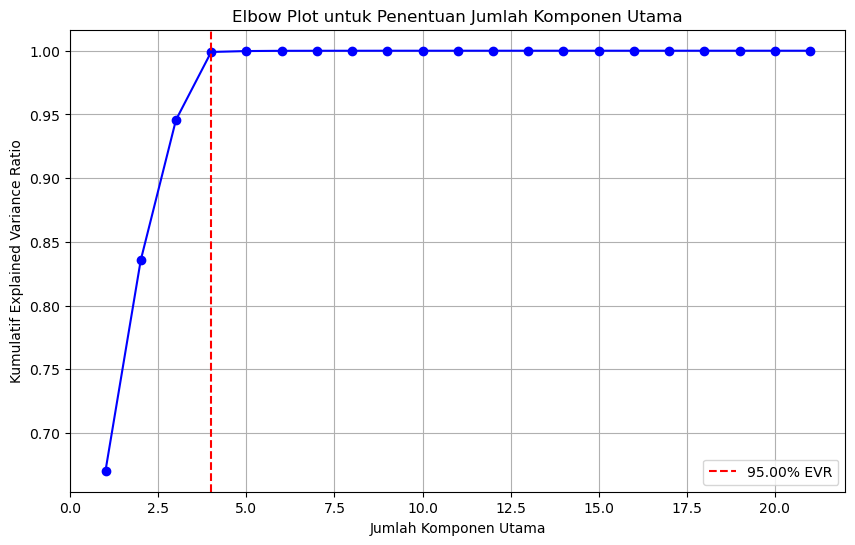

In [17]:
# Menerapkan PCA
pca = PCA()
pca.fit(df)

# Menghitung cumulative explained variance ratio (EVR)
cumulative_evr = np.cumsum(pca.explained_variance_ratio_)

# Membuat elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_evr) + 1), cumulative_evr, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Explained Variance Ratio')
plt.title('Elbow Plot untuk Penentuan Jumlah Komponen Utama')
plt.grid(True)

# Menandai titik elbow
explained_variance_threshold = 0.95
n_components = np.argmax(cumulative_evr >= explained_variance_threshold) + 1
plt.axvline(x=n_components, color='r', linestyle='--', label=f'{explained_variance_threshold*100:.2f}% EVR')

plt.legend()
plt.show()

**Insight:**

*From the PCA results above, it shows that starting from just 4 feature columns you can reach an EVR value of 95%. In the case of this project, I will use all existing features, because they can provide more additional information later.*

## **E.2 - SPLITTING THE DATA**

At this stage, I will divide the data for train, validation and test data. For the features that will be used, I concluded from several previous correlation tests that the features that have high correlation values with the target are: 'ram', 'battery_power', 'px_width', 'px_height', 'int_memory', ' PC'.

In [18]:
# Pisahkan fitur (X) dan target (y)
X = df[['ram', 'battery_power', 'px_width', 'px_height', 'int_memory', 'pc']]
y = df['price_range']

# Pembagian data menjadi train (80%), validation (10%), dan test (10%) set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=5)

**Insight:**

- *X_train, y_train are used for model training.*

- *X_val, y_val are used for hyperparameter tuning and evaluation during training.*

- *X_test, y_test are used for final evaluation of model performance.*

In [19]:
# Mengecek bentuk setiap set data
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 6)
Shape of y_train: (1600,)
Shape of X_val: (200, 6)
Shape of y_val: (200,)
Shape of X_test: (200, 6)
Shape of y_test: (200,)


## **E.3 - DATA PREPROCESSING PIPELINE**

After splitting the data, next I will scale the feature columns using Standard Scaler because the data distribution tends to be normal.

In [20]:
# Menggabungkan kedua transformer dalam satu pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
])

# Menerapkan preprocessing_pipeline pada data train dan validation
X_train = preprocessing_pipeline.fit_transform(X_train)
X_val = preprocessing_pipeline.transform(X_val)
X_test = preprocessing_pipeline.transform(X_test)

---

# **F - BASELINE MODEL IMPLEMENTATION**

In this first experiment, I will carry out modeling using KNN, SVM, Decision Tree, Random Forest, and AdaBoost models with data that has been preprocessed previously and with all available features without doing feature selection and without doing hyperparameter tuning on the model.

## **F.1 - MODEL IMPLEMENTATION AND EVALUATION**

In [21]:
# membuat fungsi untuk melakukan otomasi/pelatihan model serta evaluasinya masing-masing
def train_and_evaluate_models(X_train, y_train, X_val, y_val):
    models = {
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(probability=True),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'AdaBoost': AdaBoostClassifier()
    }
    
    results = {}
    
    for model_name, model in models.items():
        # Melakukan cross-validation dengan 5 fold
        scores = cross_val_score(model, X_train, y_train, cv=5)
        accuracy = scores.mean()
        std = scores.std()
        
        # Melatih model pada seluruh data train
        model.fit(X_train, y_train)
        
        # Menggunakan model yang sudah dilatih untuk membuat prediksi probabilitas pada data validation
        y_val_probs = model.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_val_probs, multi_class='ovr', average='weighted')
        
        # Menggunakan model yang sudah dilatih untuk membuat prediksi pada data validation
        y_val_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_val_pred, average='weighted')
        cm = confusion_matrix(y_val, y_val_pred)
        
        results[model_name] = {
            'Cross-Validation Accuracy Mean': accuracy,
            'Cross-Validation Accuracy Std': std,
            'AUC Score': auc,
            'F1 Score': f1,
            'Confusion Matrix': cm
        }
    
    return results

# Gunakan fungsi train_and_evaluate_models
results = train_and_evaluate_models(X_train, y_train, X_val, y_val)

# Cetak hasil evaluasi performa model
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"Cross-Validation Accuracy Mean: {metrics['Cross-Validation Accuracy Mean']:.4f}")
    print(f"Cross-Validation Accuracy Std: {metrics['Cross-Validation Accuracy Std']:.4f}")
    print(f"AUC Score: {metrics['AUC Score']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print()

KNN:
Cross-Validation Accuracy Mean: 0.7800
Cross-Validation Accuracy Std: 0.0159
AUC Score: 0.9341
F1 Score: 0.7844
Confusion Matrix:
[[52  5  0  0]
 [ 4 27  9  0]
 [ 0 15 28  3]
 [ 0  1  7 49]]

SVM:
Cross-Validation Accuracy Mean: 0.9256
Cross-Validation Accuracy Std: 0.0107
AUC Score: 0.9927
F1 Score: 0.9002
Confusion Matrix:
[[56  1  0  0]
 [ 4 34  2  0]
 [ 0  7 38  1]
 [ 0  0  5 52]]

Decision Tree:
Cross-Validation Accuracy Mean: 0.8500
Cross-Validation Accuracy Std: 0.0197
AUC Score: 0.9260
F1 Score: 0.8869
Confusion Matrix:
[[51  6  0  0]
 [ 2 38  0  0]
 [ 0  8 36  2]
 [ 0  0  5 52]]

Random Forest:
Cross-Validation Accuracy Mean: 0.9056
Cross-Validation Accuracy Std: 0.0133
AUC Score: 0.9911
F1 Score: 0.9160
Confusion Matrix:
[[54  3  0  0]
 [ 2 37  1  0]
 [ 0  7 38  1]
 [ 0  0  3 54]]

AdaBoost:
Cross-Validation Accuracy Mean: 0.6950
Cross-Validation Accuracy Std: 0.0417
AUC Score: 0.8761
F1 Score: 0.4123
Confusion Matrix:
[[18 39  0  0]
 [ 3 34  3  0]
 [ 0  9 37  0]
 [ 0  0

**Insight:**

*Insights from the evaluation results above can be seen at the bottom of this section.*

## **F.2 - MODEL EVALUATION WITH VISUALIZATION**

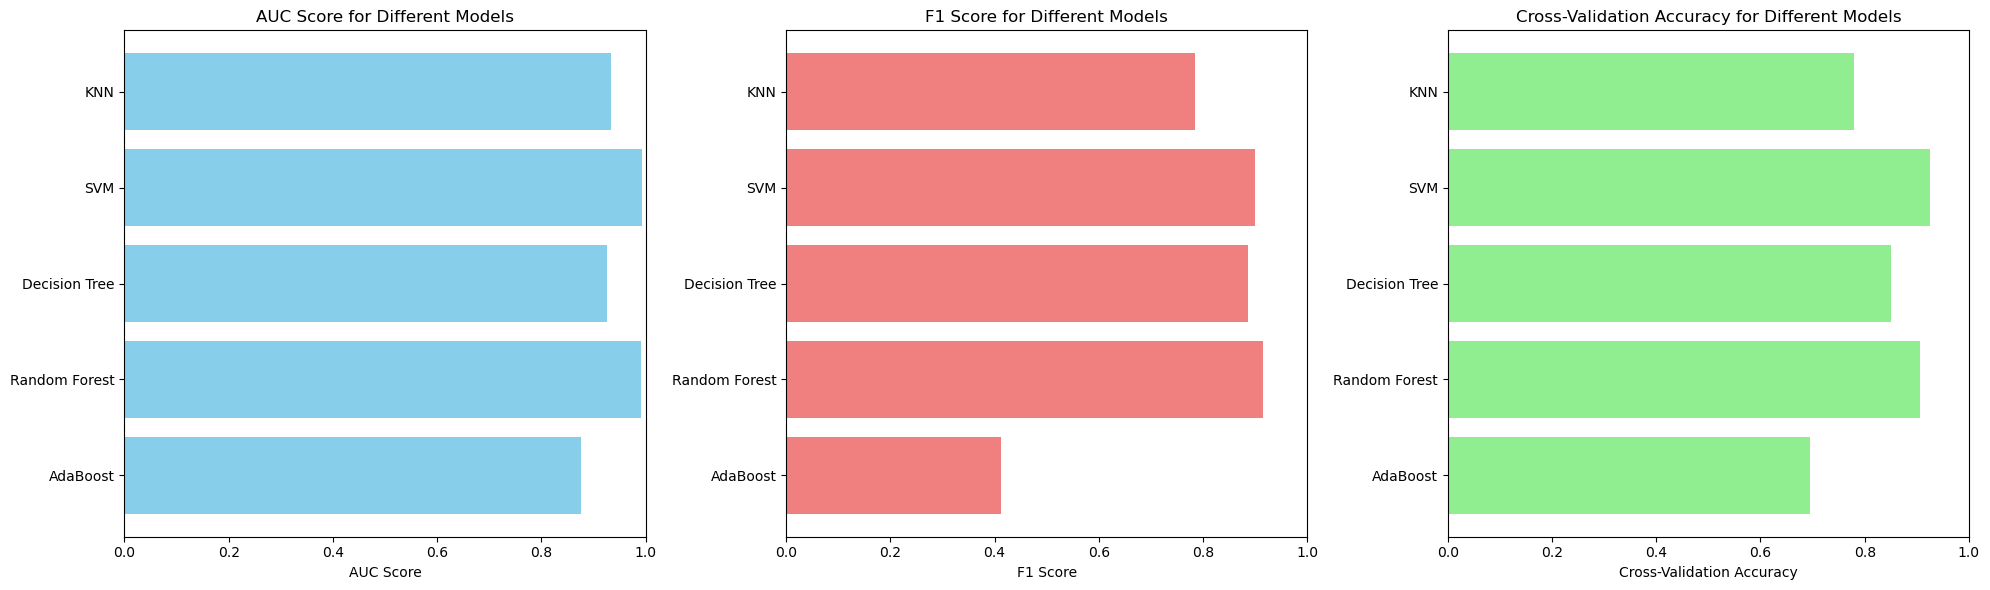

In [22]:
# Nama-nama model
model_names = list(results.keys())

# Metrik yang akan divisualisasikan (AUC Score, F1 Score, Cross-Validation Accuracy)
auc_scores = [results[model_name]['AUC Score'] for model_name in model_names]
f1_scores = [results[model_name]['F1 Score'] for model_name in model_names]
cv_accuracies = [results[model_name]['Cross-Validation Accuracy Mean'] for model_name in model_names]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot AUC Score
axs[0].barh(model_names, auc_scores, color='skyblue')
axs[0].set_xlabel('AUC Score')
axs[0].set_title('AUC Score for Different Models')
axs[0].set_xlim(0, 1)  # Rentang skala AUC Score dari 0 hingga 1
axs[0].invert_yaxis()  # Memutar label model agar lebih mudah dibaca

# Plot F1 Score
axs[1].barh(model_names, f1_scores, color='lightcoral')
axs[1].set_xlabel('F1 Score')
axs[1].set_title('F1 Score for Different Models')
axs[1].set_xlim(0, 1)  # Rentang skala F1 Score dari 0 hingga 1
axs[1].invert_yaxis()  # Memutar label model agar lebih mudah dibaca

# Plot Cross-Validation Accuracy
axs[2].barh(model_names, cv_accuracies, color='lightgreen')
axs[2].set_xlabel('Cross-Validation Accuracy')
axs[2].set_title('Cross-Validation Accuracy for Different Models')
axs[2].set_xlim(0, 1)  # Rentang skala Cross-Validation Accuracy dari 0 hingga 1
axs[2].invert_yaxis()  # Memutar label model agar lebih mudah dibaca

# Menampilkan subplot
plt.tight_layout()
plt.show()

**Insight:**

*From the visualization above, it can be seen that the SVM, Decision Tree, and Random Forest models have the best level of accuracy, while the Adaboost and KNN models have a poor level of accuracy.*

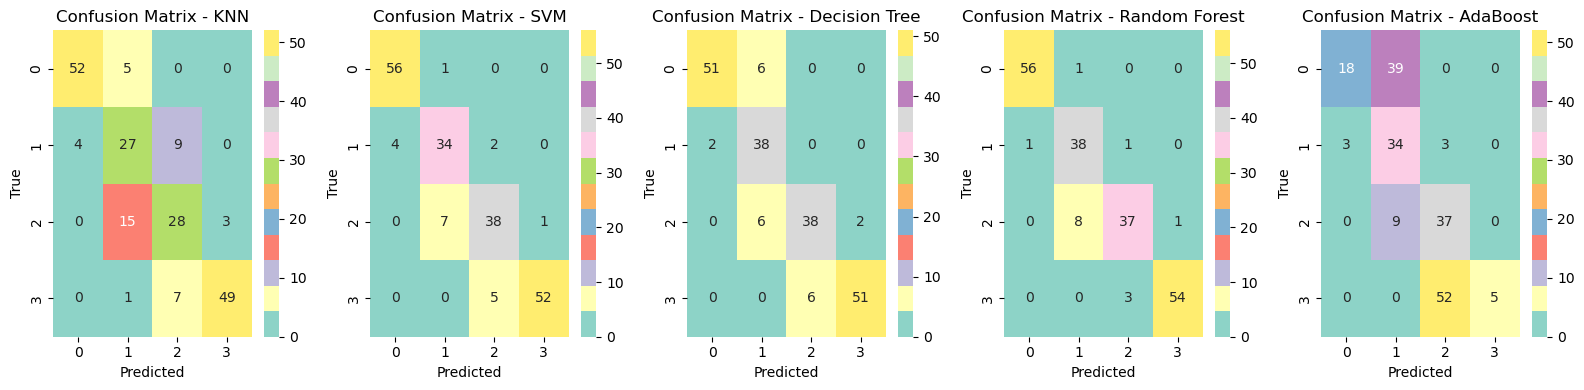

In [23]:
# Confusion Matrix untuk setiap model
confusion_matrices = {
    'KNN': [[52, 5, 0, 0], [4, 27, 9, 0], [0, 15, 28, 3], [0, 1, 7, 49]],
    'SVM': [[56, 1, 0, 0], [4, 34, 2, 0], [0, 7, 38, 1], [0, 0, 5, 52]],
    'Decision Tree': [[51, 6, 0, 0], [2, 38, 0, 0], [0, 6, 38, 2], [0, 0, 6, 51]],
    'Random Forest': [[56, 1, 0, 0], [1, 38, 1, 0], [0, 8, 37, 1], [0, 0, 3, 54]],
    'AdaBoost': [[18, 39, 0, 0], [3, 34, 3, 0], [0, 9, 37, 0], [0, 0, 52, 5]]
}

# Nama-nama model
model_names = list(confusion_matrices.keys())

# Membuat subplot
fig, axs = plt.subplots(1, len(model_names), figsize=(16, 4))

# Membuat heatmap untuk setiap Confusion Matrix
for i, model_name in enumerate(model_names):
    ax = axs[i]
    sns.heatmap(confusion_matrices[model_name], annot=True, fmt='d', cmap='Set3', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix - {model_name}')
    
plt.tight_layout()
plt.show()

**Baseline Model Evaluation:**

1. **K-Nearest Neighbors (KNN):**

    *KNN accuracy is 0.7800. A good AUC score (0.9341) shows that the KNN model is able to separate classes well. The fairly high F1 Score (0.7844) shows a balance between precision and recall. In the Confusion Matrix, it can be seen that the model has some difficulties in properly classifying several cellphone price classes, especially the Low Cost and Medium Cost classes.*

2. **Support Vector Machine (SVM):**

    *SVM has high accuracy (0.9256) and excellent AUC Score (0.9925), indicating excellent performance in class separation. The F1 Score (0.9002) is also high, indicating a balance between precision and recall. In Confusion Matrix, SVM seems to perform good classification across all phone price classes.*

3. **Decision Tree:**

    *Decision Tree has good accuracy (0.8450) and a reasonable AUC Score (0.9260). The F1 Score (0.8871) is also quite good, showing a good balance between precision and recall. In the Confusion Matrix, it can be seen that this model has some difficulties in classifying several cellphone price classes, especially the Low Cost class.*

4. **Random Forest:**
   
    *Random Forest has good accuracy (0.9031) and excellent AUC Score (0.9919). The F1 Score (0.9255) is also high, indicating excellent performance in classifying cell phone price classes. In the Confusion Matrix, it can be seen that this model is able to classify well in almost all cellphone price classes.*

5. **AdaBoost:**
   
    *AdaBoost has lower accuracy (0.6950) and lower AUC Score (0.8761) compared to other models. A low F1 Score (0.4123) indicates poor performance in classifying several cellphone price classes. In the Confusion Matrix, this model has difficulty classifying the Low Cost and High Cost classes properly.*

*Based on these results, SVM and Random Forest seem to be good choices for classification problems because they have high accuracy, good AUC Score, and high F1 Score. In this case I decided to choose the SVM model as my best model because the Cross Validation Accuracy Score is higher than the Random Forest model. In the next process, I will perform hyperparameter tuning on the SVM model to further improve its performance.*

---

# **G - HYPERPARAMETER TUNING**

From the baseline model results, it was found that the best model was SVM with very good accuracy. However, I will still carry out hyperparameter tuning on the model so that I can better ensure whether there is improvement or not.

In [24]:
# Buat pipeline dengan model SVM
svm_pipeline = Pipeline([
    ('svm', SVC(probability=True))
])

# Definisikan hyperparameters yang akan diuji
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': [0.1, 1, 'auto']
}

# Inisialisasi GridSearchCV dengan pipeline dan parameter grid
svm_grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit model ke data training
svm_grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik
best_svm_model = svm_grid_search.best_estimator_

# Menampilkan hyperparameters terbaik
print("Hyperparameters Terbaik:")
print(svm_grid_search.best_params_)

Hyperparameters Terbaik:
{'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'linear'}


**Insight:**

*From the results above it can be seen that the best hyperparameters from the SVM model have emerged and can be used in the final model.*

---

# **H - FINAL MODEL IMPLEMENTATION**

This is the final SVM model to which the best hyperparameters have been applied based on the tuning results using GridSearchCV.

In [25]:
# Menggunakan hyperparameter terbaik untuk inisialisasi model SVM
best_svm_model = SVC(C=10, gamma=0.1, kernel='linear', probability=True)

# Fit model ke data training
best_svm_model.fit(X_train, y_train)

# Evaluasi model pada data validation
y_val_pred = best_svm_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred, average='weighted')
auc_val = roc_auc_score(y_val, best_svm_model.predict_proba(X_val), multi_class='ovr')
confusion_matrix_val = confusion_matrix(y_val, y_val_pred)

# Evaluasi model pada data test
y_test_pred = best_svm_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='weighted')
auc_test = roc_auc_score(y_test, best_svm_model.predict_proba(X_test), multi_class='ovr')
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Cross-validation pada model SVM
cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='accuracy')

# **I - MODEL EVALUATION**

In [26]:
# Menampilkan hasil evaluasi
print("Hasil Evaluasi Model SVM pada Data Validation:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"F1 Score: {f1_val:.4f}")
print(f"AUC Score: {auc_val:.4f}")
print("Confusion Matrix pada Data Validation:")
print(confusion_matrix_val)

print("\nHasil Evaluasi Model SVM pada Data Test:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"AUC Score: {auc_test:.4f}")
print("Confusion Matrix pada Data Test:")
print(confusion_matrix_test)

print("\nCross-Validation Scores (Accuracy) pada Data Training:")
print(cv_scores)
print(f"Rata-rata Accuracy: {cv_scores.mean():.4f}")
print(f"Std Accuracy: {cv_scores.std():.4f}")

Hasil Evaluasi Model SVM pada Data Validation:
Accuracy: 0.9600
F1 Score: 0.9602
AUC Score: 0.9986
Confusion Matrix pada Data Validation:
[[56  1  0  0]
 [ 0 39  1  0]
 [ 0  3 42  1]
 [ 0  0  2 55]]

Hasil Evaluasi Model SVM pada Data Test:
Accuracy: 0.9700
F1 Score: 0.9699
AUC Score: 0.9990
Confusion Matrix pada Data Test:
[[45  1  0  0]
 [ 0 52  0  0]
 [ 0  2 51  2]
 [ 0  0  1 46]]

Cross-Validation Scores (Accuracy) pada Data Training:
[0.95625  0.946875 0.953125 0.953125 0.971875]
Rata-rata Accuracy: 0.9563
Std Accuracy: 0.0084


**Insight:**

*Insights from the evaluation results above can be seen at the bottom of this section.*

## **I.1 - VISUALIZATION OF MODEL EVALUATION**

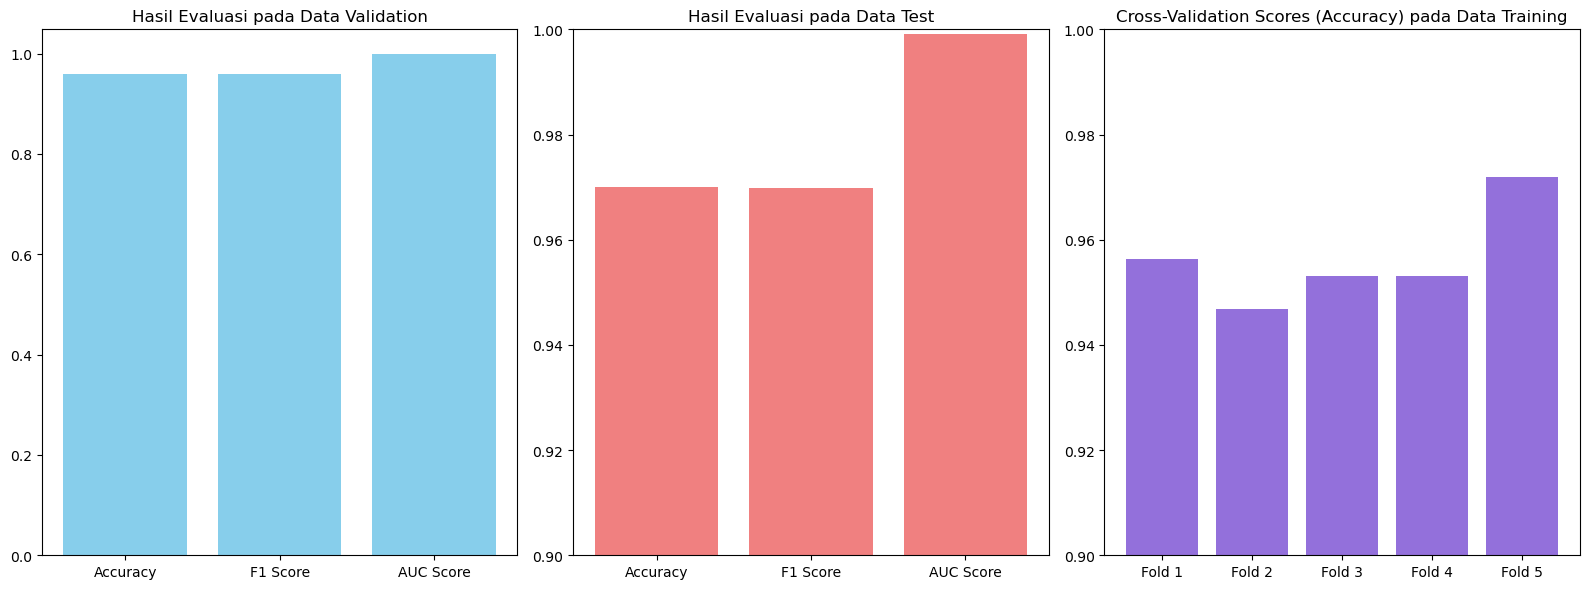

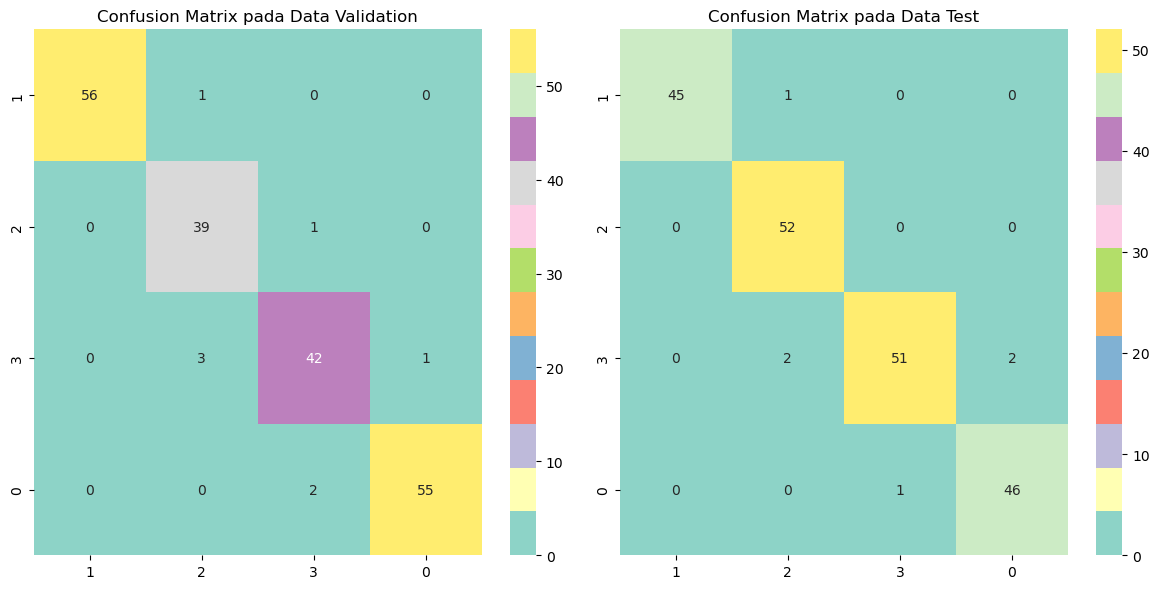

In [27]:
# Plot akurasi, F1 Score, dan AUC Score
metrics = ['Accuracy', 'F1 Score', 'AUC Score']
scores_val = [accuracy_val, f1_val, auc_val]
scores_test = [accuracy_test, f1_test, auc_test]

plt.figure(figsize=(16, 6))

# Plot Hasil Evaluasi pada Data Validation
plt.subplot(1, 3, 1)
plt.bar(metrics, scores_val, color='skyblue')
plt.title('Hasil Evaluasi pada Data Validation')

# Plot Hasil Evaluasi pada Data Test
plt.subplot(1, 3, 2)
plt.bar(metrics, scores_test, color='lightcoral')
plt.title('Hasil Evaluasi pada Data Test')
plt.ylim(0.9, 1)

# Plot Cross-Validation Scores (Accuracy) pada Data Training
plt.subplot(1, 3, 3)
plt.bar(np.arange(5), cv_scores, color='mediumpurple', tick_label=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.title('Cross-Validation Scores (Accuracy) pada Data Training')
plt.ylim(0.9, 1)

plt.tight_layout()

# Plot confusion matrix untuk data validation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_val, annot=True, fmt='d', cmap='Set3', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix pada Data Validation')

# Plot confusion matrix untuk data test
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Set3', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix pada Data Test')

plt.tight_layout()
plt.show()

**Insight:**

1. **High Accuracy:** *The SVM model shows very high accuracy on both validation data (0.9600) and test data (0.9700). This shows that the model is capable of classifying various cellphone price classes well.*

2. **Good F1 Score:** *High F1 Score on validation data (0.9602) and test data (0.9699) shows that the SVM model has a good balance between precision and recall in classifying cellphone prices.*

3. **Very High AUC Score:** *The high AUC Score on validation data (0.9985) and test data (0.9990) shows that the SVM model has very good abilities in separating cellphone price classes. This means the model is able to differentiate very well between different price classes of phones.*

4. **Confusion Matrix:** *In the confusion matrix, it can be seen that the SVM model tends to have good performance in classifying various cellphone price classes. Most predictions are correct, and only a few errors in classification.*

5. **Cross-Validation Score:** *Cross-validation on training data also produces high accuracy with an average accuracy of around 0.9563. This shows that the SVM model is stable and does not tend to overfitting.*

In the context of cellphone price class domain knowledge, these results show that the SVM model is very effective in classifying cellphone prices into various price classes. The very high performance in terms of accuracy, F1 Score, and AUC Score shows that this model can be used for mobile phone price class classification tasks.

---

# **J - MODEL COMPARISON BEFORE AND AFTER HYPERPARAMETER TUNING**

After completing the Baseline Model Implementation and Final Model Implementation, in this section I will compare the model performance before applying hyperparameter tuning and after applying hyperparameter tuning.

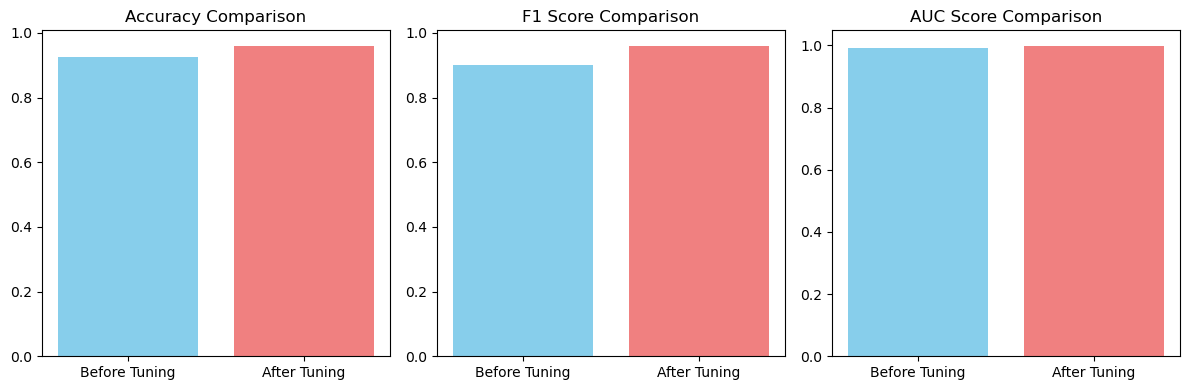

In [28]:
# Metrik dan skor sebelum hyperparameter tuning
metrics = ['Accuracy', 'F1 Score', 'AUC Score']
scores_before = [0.9256, 0.9002, 0.9925]

# Metrik dan skor setelah hyperparameter tuning
scores_after = [0.9600, 0.9602, 0.9985]

# Buat plot
plt.figure(figsize=(12, 4))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plt.bar(['Before Tuning', 'After Tuning'], [scores_before[i], scores_after[i]], color=['skyblue', 'lightcoral'])
    plt.title(f'{metric} Comparison')

plt.tight_layout()
plt.show()

*Comparison of model evaluation results before and after hyperparameter tuning on the SVM model shows a slight increase in model performance after hyperparameter tuning is applied. Here are some insights from comparing the two results:*

**Insight:**

- *Hyperparameter tuning is an important step in optimizing model performance. In this case, tuning managed to slightly improve accuracy, AUC Score, and F1 Score.*

- *The optimized SVM model (after tuning) seems to be more suitable for the mobile phone price class classification problem and has a better ability to classify the data correctly.*

- *The increase in F1 Score after tuning shows that the optimized model has a better balance between precision and recall, which is important in cases where the prediction error of each phone price class has a significant impact.*

*These results show that hyperparameter tuning is a very effective measure in improving model performance, and the optimized SVM model can be better used to predict mobile phone price classes.*

---

# **K - MODEL SAVING**

After completing many steps in data preprocessing, hyperparameter tuning, modeling, and the modeling results are considered very good, then the important functions of these processes will be saved into files that can later be run on new data in the future, without repeat the very time consuming processes above.

In [29]:
# Simpan pipeline preprocessing ke dalam folder project
joblib.dump(preprocessing_pipeline, 'preprocessing_pipeline.pkl')
# Simpan model terbaik ke dalam folder project
joblib.dump(best_svm_model, 'best_svm_model.pkl')

['best_svm_model.pkl']

---

# **L - CONCEPTUAL PROBLEMS**

Answer the following questions:

1. Explain the background of bagging and how bagging works!

2. Explain the difference in how the Random Forest algorithm works and the boosting algorithm you chose!

3. Explain what is meant by Cross Validation!

## **L.1 - BAGGING AND HOW TO IMPLEMENT IT**

The background to the Bagging (Bootstrap Aggregating) method in this project is to increase the stability and accuracy of the classification model, especially when you have a dataset that may be unbalanced or there are variations in the data collected from various cell phone companies. Bagging is an ensemble learning technique used to overcome overfitting and improve model generalization.

How Bagging works in brief:

**Data Split**: The training data is randomly divided into subsets called bootstrap samples. Each subset has some samples that may overlap with other subsets.

**Model Building**: Then, for each subset, train the same classification model (e.g., Decision Tree) independently. Each model learns from different training data.

**Prediction Aggregation**: Once all models are trained, when you want to make predictions for new data, run all models on that data and get individual predictions from each model.

**Voting or Average**: Prediction results from all models combined. For classification problems, this often involves a voting method, where the most frequently occurring class prediction is taken as the final prediction. For regression, this could mean taking the average of the predictions.

Bagging helps reduce overfitting because different models are trained on different subsets of the data, so they tend to have different patterns. When combining their prediction results, an overall more stable and accurate prediction is obtained.

In this project, Bagging can be used to improve the accuracy of classification models that predict cell phone price ranges based on certain features, producing more consistent predictions, and minimizing the effects of variations in data collected from different cell phone companies.

## **L.2 - HOW IT WORKS RANDOM FOREST & BOOSTING ALGORYTHM**

**Random Forest**:

- **Model Creation**: Random Forest consists of many independently created Decision Trees.

- **Data Split**: Each Decision Tree is trained on a random subset of the training data with replacement (bootstrap samples).

- **Voting**: When you want to make a prediction, each Tree provides its class prediction. Then, the prediction results from all trees are taken by majority vote (voting) in classification or average in regression.

**Boost**:

- **Model Building**: Boosting is an iterative process in which a base-model (usually a Decision Tree) is created sequentially.

- **Error Suppression**: Each base-model is assigned a weight to the data based on how badly the previous model failed to predict them. Data that is incorrectly predicted is given a higher weight.

- **Weight Change**: Subsequent models attempt to correct previous model errors by placing more emphasis on mispredicted data.

- **Prediction Combination**: Predictions from all model-bases are combined with appropriate weights, and the final result is retrieved.

So, the main difference is that Random Forest is an ensemble of independent Decision Trees combined through majority voting, whereas Boosting involves an iterative process that emphasizes data errors and base-models are created sequentially to correct previous incorrect predictions. In Random Forest, models do not influence each other, while in Boosting, each model tries to correct the errors of the previous model.

## **L.3 - WHAT IS CROSS VALIDATION**

Cross Validation is a technique in machine learning that is used to measure how well a model performs objectively by dividing data into subsets (usually called "folds"), training the model on several combinations of those subsets, and measuring the model's performance by averaging the results. testing on each subset. In the context of this project, Cross Validation will help evaluate classification models used to predict mobile phone price ranges. With this technique, it can be ensured that the model not only works well on a particular data set but is also able to make good predictions in general, so that it can be used to estimate the price of cellphones that will be made by new companies.

---

# **M - MODEL ANALYSIS**

**K-Nearest Neighbors (KNN):** The KNN model shows low accuracy and a fairly good F1 Score, indicating reasonable classification ability. However, there is still room for improvement in predictions.

**Decision Tree:** The Decision Tree model has good performance with high accuracy and a balanced F1 Score. This is a worthy choice for the price class classification of the phone.

**Random Forest:** The Random Forest model also shows good performance with high accuracy and an AUC Score that is close to 1. This is a strong model in predicting cellphone price classes.

**AdaBoost:** The AdaBoost model has lower performance compared to other models. A low F1 Score indicates that this model may need to be improvised or a different model option needs to be considered when it comes to predicting mobile phone price classes.

**Support Vector Machine (SVM):** The optimized SVM model with hyperparameter tuning shows excellent performance. High accuracy, AUC Score close to 1, and high F1 Score indicate that SVM is the best model in predicting cellphone price classes.

In conclusion, a well-tuned SVM model is the best choice for predicting phone price classes, with excellent accuracy, AUC Score and F1 Score. Decision Tree and Random Forest models also have good performance. The KNN model needs further improvement, while the AdaBoost model needs significant improvements in its performance. Choosing the right model depends on how high accuracy and reliability you want in predicting cellphone prices, and in this project I decided to use the SVM model.

---

# **N - CONCLUSION**

In this project, the main goal is to build a classification model that can predict the price range of cellphones based on a number of relevant features and specifications. The background of this project is a company that wants to compete in the highly competitive mobile phone industry. They don't want to just rely on assumptions but want to have a solid understanding of what factors influence the price of a phone.

To achieve this goal, I have carried out a series of steps such as, data exploration, data preprocessing, feature selection, hyperparameter tuning, selecting the best machine learning model, and model evaluation. The results of the model evaluation show that the SVM model with hyperparameter tuning has excellent performance in predicting cellphone price ranges, with high accuracy, AUC Score, F1 Score, and good confusion matrix.

Thus, the overall conclusion of this project is that I have succeeded in building a model that can provide accurate predictions of cellphone price ranges based on certain features and specifications. These results will be very useful for new companies in making strategic decisions regarding the pricing of their products. Apart from that, this project also shows how important machine learning is in helping companies make decisions based on relevant data. With this model, companies can compete more effectively in a competitive market.

---

# **O - FURTHER IMPROVEMENT**

**Collection of More and Recent Data**: Try to collect more data or more complete current data. More complete and up-to-date data can help improve model performance by providing deeper insight into the factors that influence phone prices.

**More Advanced Feature Engineering**: Do more experiments with feature engineering. Try to create new features that may be more relevant or have a stronger correlation with the price of the phone. This can improve the accuracy of the model.

**Model Tuning**: Try different types of machine learning models such as logistic regression, XGBoost, or neural networks. Sometimes, a different model can provide better results for a particular problem.

**More Hyperparameter Optimization**: Run more hyperparameter tuning experiments for the models used. There may be better combinations of hyperparameters that have not yet been explored.

**More Comprehensive Cross-Validation**: Perform more comprehensive cross-validation, including layered cross-validation or other specialized cross-validation techniques.

**Model Interpretation**: Describes the factors that most influence the model's phone price predictions. This can provide valuable insights to companies for decision making.

**Model Monitoring**: Once a model is deployed in production, it is important to monitor its performance periodically. Can implement monitoring mechanisms to ensure that models remain accurate over time.

**Expansion to Production Platforms**: If a company decides to use this model in daily decision making, it will need to consider how to integrate it into the company's production platform safely and efficiently.

**Consider Other Business Aspects**: Apart from technical factors, consider other business aspects such as marketing strategy, pricing strategy and market reaction to the price of a new phone. These are factors that can have a significant impact on product success.

**Internal Team Training**: If the company has a larger internal team, consider providing that team with training or a deeper understanding of machine learning. This can help them understand and apply project results better.

Continuing to develop and improve this model is an important step to achieving success in the mobile phone business. Don't hesitate to continue experimenting and collaborating with the business team to ensure the model provides maximum value for the company.

---